Organizers of a local fitness club have heard about a new popular diet that claims to improve fitness performance. 
The have decided that they want to find out if the diet does work. They design an AB Test that can disprove 
the health claims. Email invitations are sent out to all goup members and many want to help with the experiment. All members 
agree to a metric which measures the amount of an athletic activity. Each person in the experiment records their own athletic 
activity and diet for a month. At the end of the month there is a test and results are recorded. Organizers notice that only 10% of people have sufficient results necessary to be labeled successful. Organizers hope to see the success rate double with the new diet. For the experiment half of the volunteers are told to keep the same exercise routine to exclude bias but half start the diet. Results are recorded and analyzed at the end of the experiment.


In [1]:
#Import python libraries
import numpy as np
from numpy import random
import pandas as pd
import scipy as sp
import statsmodels.stats.api as sm
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
#import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import math, datetime, random
from datetime import date,time,timedelta


In [2]:
#Determine the minimum number of sample for the results to be significant
effectSize = sm.proportion_effectsize(0.1, 0.2)

min_n = sm.NormalIndPower().solve_power(
    effectSize, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    ) 
min_n=math.ceil(min_n)
print('Effect Size: ',effectSize)
print('Minimum N: ',min_n)

Effect Size:  -0.2837941092083278
Minimum N:  195


In [3]:
#Create initial dataset
total=np.arange(1,1001)

volunteers=random.randint(min_n*2,1000)
vhalf=volunteers//2
volunteers=vhalf*2
print('number of volunteers: ',volunteers)

memberid=np.random.choice(total,size=volunteers,replace=False)
print('number of ids: ',memberid.size)



number of volunteers:  594
number of ids:  594


In [5]:
#Half of the volunteers are the control group and other half has the diet

#create 50/50 control/treatment label list
a=np.full(vhalf,'control',dtype=(str,7))
b=np.full(vhalf,'treatment',dtype=(str,9))

#create success rate for each group
asuccess=np.random.choice([0,1],size=vhalf,p=[.9,.1])
bsuccess=np.random.choice([0,1],size=vhalf,p=[.8,.2]) 

#concatenate the seperate arrays
group=np.concatenate((a,b),axis=0)
success=np.concatenate((asuccess,bsuccess),axis=0)


print('asuccsess: ',np.count_nonzero(asuccess==1))
print('bsuccess: ',np.count_nonzero(bsuccess==1))



asuccsess:  37
bsuccess:  60


In [6]:
#Add id numbers, group, and performance metric into DataFrame
df=pd.DataFrame()
df['Id']=memberid
df['Group']=group
df['Success']=success

print(df)

      Id      Group  Success
0     40    control        0
1    719    control        0
2    412    control        0
3    945    control        0
4    203    control        0
..   ...        ...      ...
589  907  treatment        0
590  838  treatment        0
591  393  treatment        0
592  112  treatment        0
593  508  treatment        0

[594 rows x 3 columns]


In [7]:
#Split dataframe into control and treatment sample with the minimun n amount
control = df[df['Group'] == 'control'].sample(n=min_n)
treatment = df[df['Group'] == 'treatment'].sample(n=min_n)

#Contenate control and treatment into sample dataframe
sample=pd.concat([control,treatment],axis=0)
sample.reset_index(inplace=True)

print('length of control:',len(control))
print('length of treatment:',len(treatment))



length of control: 195
length of treatment: 195


In [12]:
#Number of success for control and treatment
xco=control['Success'].value_counts()[1]
xtr=treatment['Success'].value_counts()[1]

phat1=xco/min_n
phat2=xtr/min_n

#Standard Error for control and treatment
secontrol=sp.stats.sem(control['Success'])
setreatment=sp.stats.sem(treatment['Success'])
print('control error:',secontrol,' treatment error:',setreatment)

control error: 0.024405884404899936  treatment error: 0.027855716655754186


In [13]:
#Display control/treatment group comparison
successrate=[phat1,phat2]
standarddev=[np.std(control.Success),np.std(treatment.Success)]
standarderr=[secontrol,setreatment]
metric=pd.DataFrame(index=['control','treatment'])
metric['SuccessRate']=successrate
metric['StandardDeviation']=standarddev
metric['StandardError']=standarderr
print(metric)

           SuccessRate  StandardDeviation  StandardError
control       0.133333           0.339935       0.024406
treatment     0.184615           0.387985       0.027856


<AxesSubplot:title={'center':'Success Rate by Group'}, xlabel='Group', ylabel='Success'>

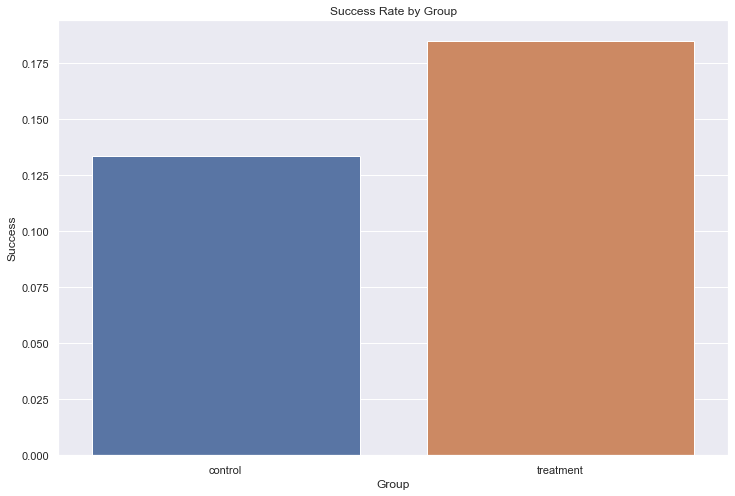

In [16]:
#Display Success Rate Graph
plt.figure(figsize=(12,8))
plt.title('Success Rate by Group')
plt.xlabel('Group')
plt.ylabel('Success Rate')
sns.barplot(x=sample.Group,y=sample.Success, ci=None)

In [15]:
#Print out final results
successes=[xco,xtr]
obsnum=[min_n,min_n]
z, p = proportions_ztest(successes, nobs=obsnum)
(lower_co, lower_tr), (upper_co, upper_tr) = proportion_confint(successes, nobs=obsnum, alpha=0.05)

print('z statistic:',abs(z))
print('p value:',p)
print('confidence interval for control: ',lower_co,upper_co)
print('confidence interval for treatment: ',lower_tr,upper_tr)

z statistic: 1.384839801055321
p value: 0.16610145772423712
confidence interval for control:  0.0856214895008758 0.18104517716579088
confidence interval for treatment:  0.1301593534029407 0.23907141582782857


There is an increase of about 5% in success rate for the treatment group. But our hypothesis states that the diet would double the number of people reaching the athletic performance metric to 20%. The p value of .16 which is greater than .05 shows that there is not enough confidence in the data to confirm the initial hypothesis.